In [1]:
import numpy as np
import pandas as pd
from simulation import simulateData
from MAP import mapFit
from MCMC import stanTopkl, MCMCFit
from generatehistogram import generatehistogramfunc, makeresidueplot, comparelognormallogt
import pickle
import math as math
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
## If it is the first time to run this code, please run this function. Otherwise, skip this part.
## This function is to complie 'stan' models first and avoid recomplie of the models.
stanTopkl()

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_6f36cc8f3764c9c386800498df12a988 NOW.
INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_927814931a413b214cb779da4541c841 NOW.


## Simulations with a Correctly Specified Model
N=10, M=40, B=1, G=3

In [2]:
N = 10
M = 40
sigma = np.repeat(0.1, N*M).reshape((N, M))
tau = np.repeat(0.05, N)
B = np.repeat(1, N)
G = np.repeat(3, M)
Y, b = simulateData(N, M, B, G, sigma, model = 'normal')
mapResult = mapFit(Y, sigma, b, tau)
mcmcChain, mcmcRes = MCMCFit(Y, b, tau, model = 'log_normal', df = 2, beta = 0.01)
tChain, tRes = MCMCFit(Y, b, tau, model = 'log_t', nu = 4, sigma = 0.141)

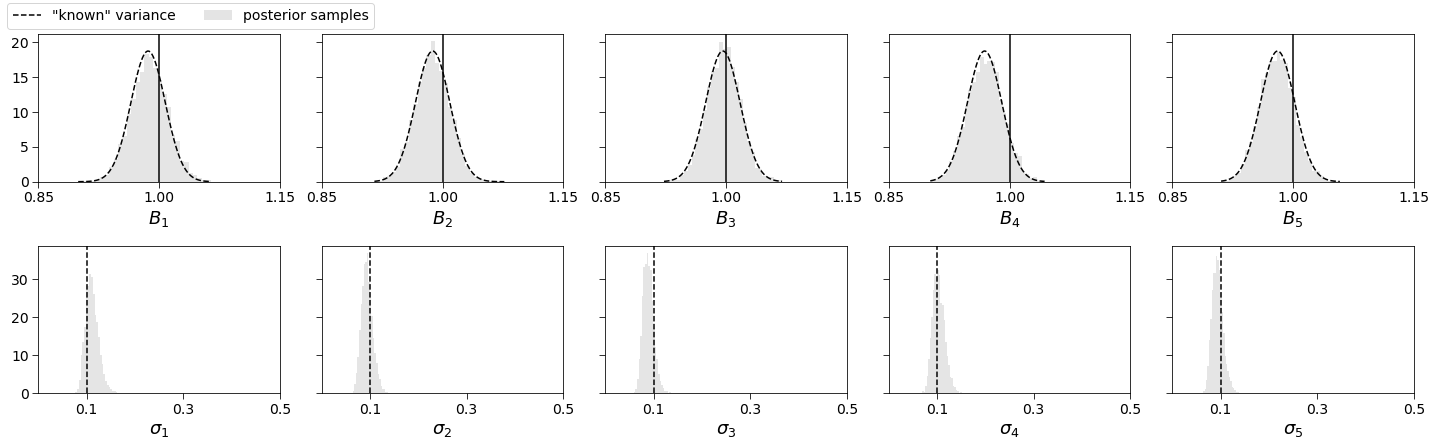

In [ ]:
mcmcChainBG = mcmcChain.values
mapResultBG = np.vstack((np.hstack((mapResult['B'], mapResult['G'])), mapResult['Sigma']))
generatehistogramfunc(mcmcChain.values, mapResultBG, N, M, B, G, sigma)

In [ ]:
makeresidueplot(N, M, Y, mcmcRes.values, mcmcChain.values, tRes.values, tChain.values)

In [ ]:
comparelognormallogt(mcmcChain.values, tChain.values, B, xtickinputB=[0.95, 1.00, 1.05])

## Simulate with a mis-specified model
Poisson Model -- N=10, M=40, B=5, G=3

In [65]:
N = 10
M = 40
sigma = np.repeat(0.1, N*M).reshape((N, M))
tau = np.repeat(0.05, N)
B = np.repeat(5, N)
G = np.repeat(3, M)
Y, b = simulateData(N, M, B, G, sigma, model = 'poisson')
mapResult = mapFit(Y, sigma, b, tau)
mcmcChain, mcmcRes = MCMCFit(Y, b, tau, model = 'log_normal', df = 2, beta = 0.01)

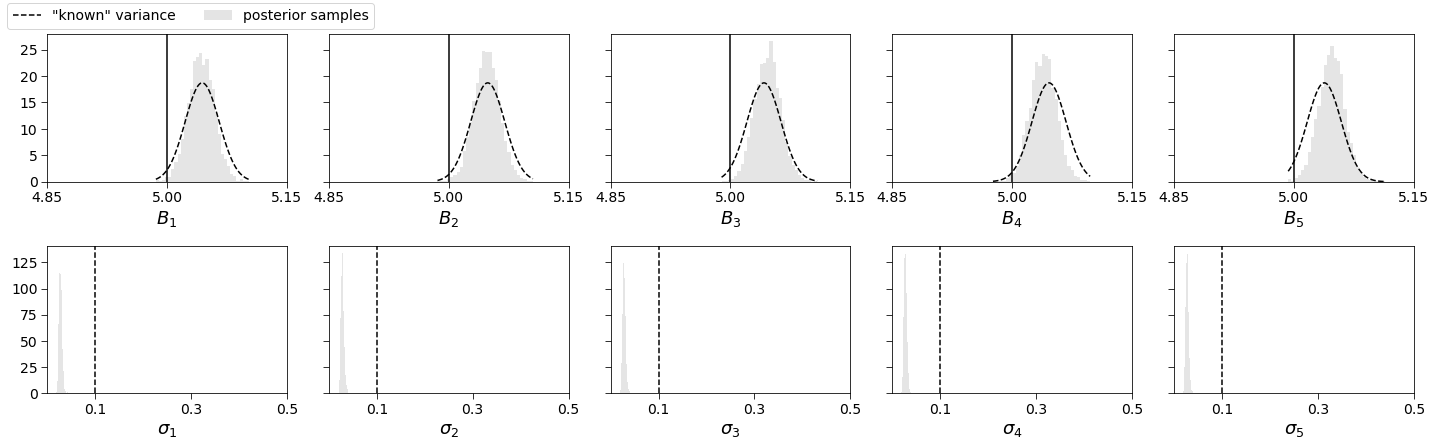

In [67]:
mcmcChainBG = mcmcChain.values
mapResultBG = np.vstack((np.hstack((mapResult['B'], mapResult['G'])), mapResult['Sigma']))
generatehistogramfunc(mcmcChain.values, mapResultBG, N, M, B, G, sigma, xtickinputB=[4.85, 5, 5.15])

Constant Model -- N=10, M=40, B=5, G=3

In [72]:
N = 10
M = 40
sigma = np.repeat(0.1, N*M).reshape((N, M))
tau = np.repeat(0.05, N)
B = np.repeat(5, N)
G = np.repeat(3, M)
Y, b = simulateData(N, M, B, G, sigma, model = 'constant')
mapResult = mapFit(Y, sigma, b, tau)
mcmcChain, mcmcRes = MCMCFit(Y, b, tau, model = 'log_normal', df = 2, beta = 0.01)

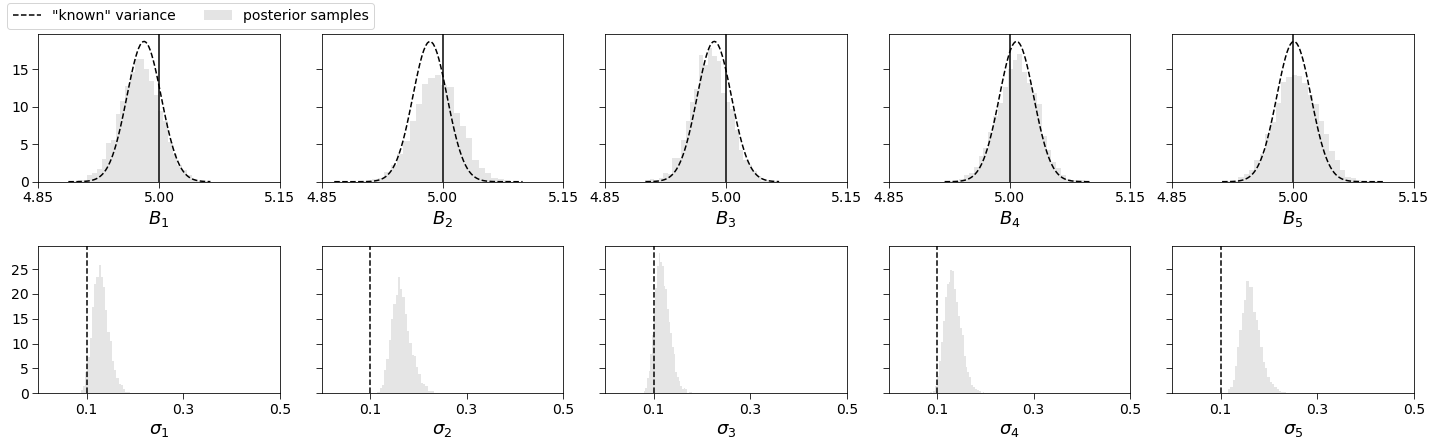

In [73]:
mcmcChainBG = mcmcChain.values
mapResultBG = np.vstack((np.hstack((mapResult['B'], mapResult['G'])), mapResult['Sigma']))
generatehistogramfunc(mcmcChain.values, mapResultBG, N, M, B, G, sigma, xtickinputB=[4.85, 5, 5.15])

Poisson and 'known' Constants Model -- N=10, M=40, B=1, G=3

In [74]:
N = 10
M = 40
sigma = np.repeat(0.1, N*M).reshape((N, M))
tau = np.repeat(0.05, N)
B = np.repeat(1, N)
G = np.repeat(3, M)
Y, b = simulateData(N, M, B, G, sigma, model = 'both')
mapResult = mapFit(Y, sigma, b, tau)
mcmcChain, mcmcRes = MCMCFit(Y, b, tau, model = 'log_normal', df = 2, beta = 0.01)

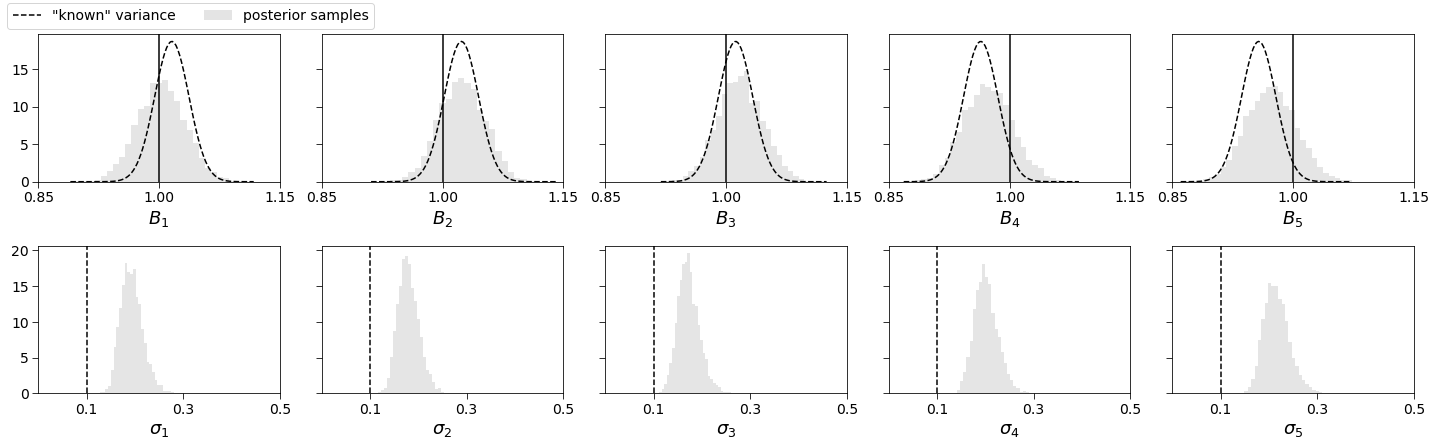

In [75]:
mcmcChainBG = mcmcChain.values
mapResultBG = np.vstack((np.hstack((mapResult['B'], mapResult['G'])), mapResult['Sigma']))
generatehistogramfunc(mcmcChain.values, mapResultBG, N, M, B, G, sigma, xtickinputB=[0.85, 1, 1.15])

TODO: Poisson Const Model 1 -- N=10, M=40, B=1, G=3

In [76]:
N = 10
M = 40
sigma = np.repeat(0.1, N*M).reshape((N, M))
tau = np.repeat(0.05, N)
B = np.repeat(1, N)
G = np.repeat(3, M)
Y, b = simulateData(N, M, B, G, sigma, model = 'poiconst')
mapResult = mapFit(Y, sigma, b, tau)
mcmcChain, mcmcRes = MCMCFit(Y, b, tau, model = 'log_normal', df = 2, beta = 0.01)

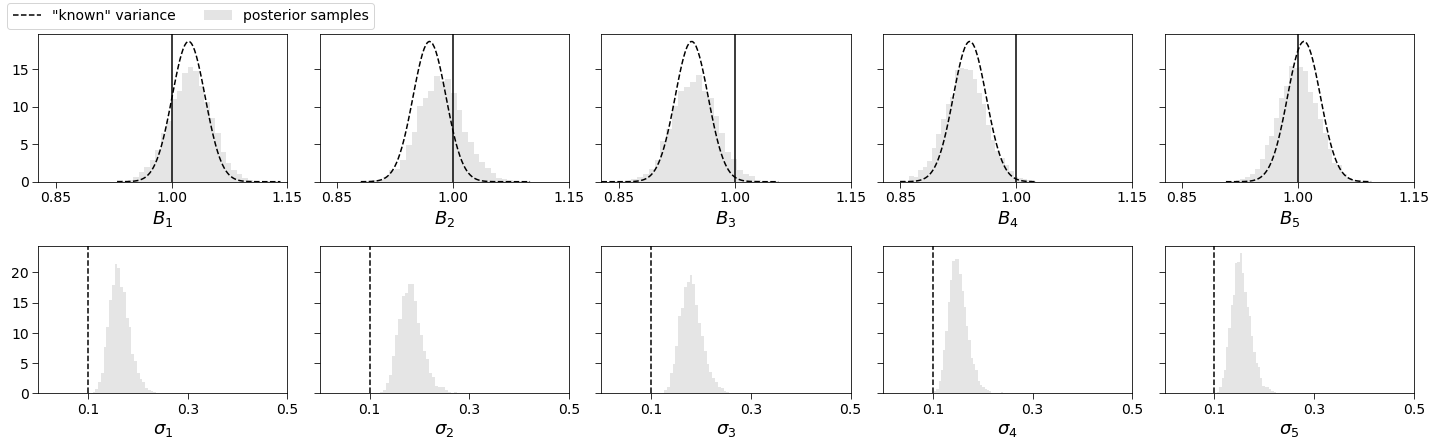

In [77]:
mcmcChainBG = mcmcChain.values
mapResultBG = np.vstack((np.hstack((mapResult['B'], mapResult['G'])), mapResult['Sigma']))
generatehistogramfunc(mcmcChain.values, mapResultBG, N, M, B, G, sigma, xtickinputB=[0.85, 1, 1.15])

TODO: Poisson Const Model 2 -- N=10, M=40, B=5, G=3

In [ ]:
N = 10
M = 40
sigma = np.repeat(0.1, N*M).reshape((N, M))
tau = np.repeat(0.05, N)
B = np.repeat(1, N)
G = np.repeat(3, M)
Y, b = simulateData(N, M, B, G, sigma, model = 'poiconst2')
mapResult = mapFit(Y, sigma, b, tau)
mcmcChain, mcmcRes = MCMCFit(Y, b, tau, model = 'log_normal', df = 2, beta = 0.01)

In [ ]:
mcmcChainBG = mcmcChain.values
mapResultBG = np.vstack((np.hstack((mapResult['B'], mapResult['G'])), mapResult['Sigma']))
generatehistogramfunc(mcmcChain.values, mapResultBG, N, M, B, G, sigma, xtickinputB=[0.85, 1, 1.15])